In [1]:
import gpytorch
from gpytorch.kernels import RBFKernel
import torch
from ntwrk.bayesopt import Surrogate
import matplotlib.pyplot as plt

In [2]:
def env(x, noise=0.02):
    return -torch.sin(3 * (x-1.)) - (x - 1.).pow(2) + 0.7 * (x-1.) + noise * torch.randn(x.shape)

In [3]:
train_x = torch.rand(3) * 3
train_y = env(train_x)

test_x = torch.linspace(0, 3)

In [4]:
lh = gpytorch.likelihoods.GaussianLikelihood()
model = Surrogate(train_x, train_y, lh, RBFKernel)

In [5]:
def train(model, train_x, train_y, iters=300):

    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    mll = gpytorch.mlls.ExactMarginalLogLikelihood(lh,
                                                   model)
    iters=300
    for i in range(iters):
        # Zero gradients from previous iteration
        optimizer.zero_grad()
        # Output from model
        output = model(train_x)
        # Calc loss and backprop gradients
        loss = -mll(output, train_y)
        loss.backward()
        optimizer.step()


In [6]:
train(model, train_x, train_y)

lh.eval();
model.eval();

pred = lh(model(test_x))

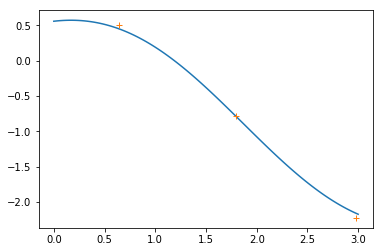

In [7]:
plt.plot(test_x, pred.mean.detach())
plt.plot(train_x, train_y, marker="+", linestyle="None")
plt.show()

In [40]:
tx = model.train_inputs[0]
ty = model.train_targets

In [41]:
tx = torch.cat((tx.clone(), torch.tensor(2.5).unsqueeze(0).unsqueeze(-1)))
ty = torch.cat((ty.clone(), env(torch.tensor([2.5]))))

In [42]:
model.set_train_data(tx, ty)

RuntimeError: Cannot modify shape of inputs (expected torch.Size([3, 1]), found torch.Size([4, 1])).